<a href="https://colab.research.google.com/github/SantiagoTadini/TP2-Datos/blob/main/ModeloXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MODELO XGBOOST https://medium.com/@jboscomendoza/tutorial-xgboost-en-python-53e48fc58f73

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
import pandas as pd
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from urllib.request import urlretrieve


from sklearn.model_selection import train_test_split

In [ ]:
url_train = 'https://raw.githubusercontent.com/SantiagoTadini/TP2-Datos/main/Features/data_train.csv'
url_test = 'https://raw.githubusercontent.com/SantiagoTadini/TP2-Datos/main/Features/data_test.csv'

data_train = pd.read_csv(url_train) #se usa para entrenar el modelo
data_test = pd.read_csv(url_test) #se usa para predecir

In [ ]:
#Separo el data frame de train en uno para entrenar y uno para probar.
model_train, model_test = train_test_split(data_train, test_size=.2, random_state=1999)


In [ ]:
 #Quitamos la variable target de los datos usando el método drop() y creamos dos matrices, una para nuestro set de entrenamiento y otra para el set de prueba.

model_train_mat = xgb.DMatrix(model_train.drop("Target", 1), label=model_train["Target"])
model_test_mat = xgb.DMatrix(model_test.drop("Target", 1), label=model_test["Target"])

model_train_mat


In [ ]:
#Podemos comenzar con el entrenamiento del modelo predictivo.
#Para entrenar un modelo usamos la función train() de xgboost.

#Hay que definir hiperparametros. Por ahora pongo medio random y despues vemos
parametros = {"booster":"gbtree", "max_depth": 4, "eta": .2, "objective": "binary:logistic", "nthread":2}
rondas = 100

#definimos una variable que contiene una lista de tuplas con los sets que serán usados para realizar la validación del modelo después de cada ronda.
evaluacion = [(model_test_mat, "eval"), (model_train_mat, "train")]

In [ ]:
modelo = xgb.train(parametros, model_test_mat, rondas, evaluacion)


[0]	eval-error:0.130589	train-error:0.142011
[1]	eval-error:0.124963	train-error:0.135347
[2]	eval-error:0.114007	train-error:0.130238
[3]	eval-error:0.111638	train-error:0.129424
[4]	eval-error:0.109861	train-error:0.126981
[5]	eval-error:0.106603	train-error:0.124389
[6]	eval-error:0.104827	train-error:0.12313
[7]	eval-error:0.105123	train-error:0.123871
[8]	eval-error:0.100977	train-error:0.118836
[9]	eval-error:0.098904	train-error:0.118244
[10]	eval-error:0.100681	train-error:0.118022
[11]	eval-error:0.100385	train-error:0.117725
[12]	eval-error:0.099497	train-error:0.117429
[13]	eval-error:0.099497	train-error:0.117133
[14]	eval-error:0.097424	train-error:0.117503
[15]	eval-error:0.096535	train-error:0.116541
[16]	eval-error:0.096832	train-error:0.116837
[17]	eval-error:0.095943	train-error:0.116615
[18]	eval-error:0.096535	train-error:0.116171
[19]	eval-error:0.09772	train-error:0.116245
[20]	eval-error:0.095943	train-error:0.115282
[21]	eval-error:0.095647	train-error:0.113875


In [ ]:
modelo

In [ ]:
#El siguiente paso es utilizar el método predict() de nuestro modelo con los datos de prueba para generar predicciones.
prediccion = modelo.predict(model_test_mat)
prediccion

array([1.7109717e-01, 4.3782013e-04, 1.9106077e-03, ..., 8.8751829e-01,
       9.7931206e-01, 1.2211549e-02], dtype=float32)

In [ ]:
#Evaluacion del modelo:
def metricas(objetivo, prediccion):
    matriz_conf = confusion_matrix(objetivo, prediccion)
    score = accuracy_score(objetivo, prediccion)
    reporte = classification_report(objetivo, prediccion)
    metricas = [matriz_conf, score, reporte]
    return(metricas)

#si >0.5, es 1 (won). si <0.5, es 0 (lost)
prediccion_bin = [1 if i > .5 else 0 for i in prediccion]
prediccion_bin[:10]

metrics = metricas(model_test["Target"], prediccion_bin)
[print(i) for i in metrics]


[[1372   95]
 [  19 1891]]
0.966242226828546
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1467
           1       0.95      0.99      0.97      1910

    accuracy                           0.97      3377
   macro avg       0.97      0.96      0.97      3377
weighted avg       0.97      0.97      0.97      3377



[None, None, None]

In [ ]:
error = log_loss(model_test['Target'], prediccion)
error

0.11943075546697057

In [ ]:
#---------------------------------------------------------------------------------------------------------------

In [ ]:
#Hasta ahi estuve jugando, ahora empieza la posta: Hay que agrupar por categoria.

# Supongo que el DataFrame con el que trabajo se llama 'data_train'
# 'x' son los datos (todas las columnas menos el target), 'y' es el target
x, y = data_train.iloc[:, :-1], data_train.iloc[:, -1]

# 'x' son los datos --> x_train son los datos con los que entrenar
#                   --> x_test son los datos con los que probar
# 'y' es el target  --> y_train son las soluciones con las que comparar lo entrenado con x_train
#                   --> y_test son las soluciones con las que comparar lo probado con x_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
x_train

#Esto lo hizo chechu y esta bien, no cambiar.

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted_USD),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,USD_Total_Amount
9798,17351,0.583205,0.579035,1,1,1,1,0.657924,735144,0.576476,0.596567,0.842271,5827,0.588664,0.973984,0.542340,0.533953,0.565249,0.455326,736545,0.601565,0.600655,0.599447,0.60092,NaN,0.59626,736694,736733,0.660559,0.433333,0.454545,0.732014,0.47685,0.33743,736554,736567,8,0.550236,2017,1,0.732014,471795.39,0.734177,471795.39,337810.22
10709,28152,0.682481,0.609115,1,1,1,1,0.657924,735782,0.576476,0.684308,0.767123,6154,0.666667,0.783942,0.542340,0.702332,0.565249,0.661927,736604,0.601565,0.600655,0.599447,0.60092,NaN,0.59626,736355,736733,0.660559,0.636842,0.748700,0.691556,50.00000,0.44952,736754,736754,3,0.510827,2018,0,0.691556,17037500.00,0.690788,17037500.00,161515.50
5593,6512,0.530258,0.318486,1,1,1,1,0.657924,736346,0.644616,0.447183,0.700000,448,0.546203,0.559063,0.542340,0.533953,0.565249,0.551836,736346,0.601565,0.600655,0.599447,0.60092,NaN,0.59626,736352,736733,0.660559,0.488476,0.589139,0.538103,0.38500,0.43547,736355,736362,1,0.510827,2017,0,0.538103,75075.00,0.536537,151593.75,88175.59
16304,7668,0.583205,0.463445,1,1,1,1,0.657924,736558,0.576476,0.752381,1.000000,9884,0.525000,0.498246,0.299274,0.533953,0.565249,0.455326,736989,0.601565,0.600655,0.599447,0.60092,NaN,0.59626,736998,736989,0.572464,0.421304,0.611940,0.490643,0.28000,0.28000,736999,737028,11,0.629657,2018,0,0.490643,54978.00,0.491718,54978.00,54978.00
4725,14783,0.530258,0.608205,1,1,1,1,0.657924,736284,0.644616,0.447183,0.666667,3058,0.546203,0.559063,0.299274,0.211223,0.565249,0.551836,736284,0.601565,0.600655,0.599447,0.60092,NaN,0.59626,736290,736341,0.260870,0.700000,0.550000,0.538103,0.38000,0.42982,736298,736310,11,0.629657,2016,6,0.538103,2246750.00,0.536537,2999530.00,2638807.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,26914,0.682481,0.609115,1,1,0,0,0.657924,735708,0.576476,0.684308,0.897291,12458,0.650994,0.659687,0.542340,0.684201,0.565249,0.585264,735716,0.601565,0.600655,0.599447,0.60092,NaN,0.59626,735988,735988,0.510815,0.647679,0.647679,0.691556,NaN,NaN,735995,735995,2,0.510827,2016,0,0.691556,4400.00,0.690788,1175400.00,41.71
13435,8618,0.682481,0.609115,1,1,1,1,0.657924,736586,0.576476,0.684308,0.600000,7913,0.666667,0.650602,0.542340,0.533953,0.565249,0.661927,736761,0.601565,0.600655,0.599447,0.60092,NaN,0.59626,1,736901,0.666667,0.421304,0.611940,0.691556,52.00000,0.46750,736957,736957,9,0.550236,2018,0,0.691556,3276000.00,0.690788,3276000.00,31056.48
7763,28416,0.455886,0.223301,1,1,1,1,0.657924,735869,0.471883,0.463061,0.298507,4765,0.593313,0.587201,0.189024,0.211223,0.565249,0.585264,736451,0.601565,0.600655,0.599447,0.60092,NaN,0.59626,736466,736733,0.660559,0.399160,0.055556,0.490643,0.35000,0.35000,736527,736531,7,0.550236,2017,3,0.490643,980784.00,0.491718,980784.00,980784.00
15377,5713,0.530258,0.483083,0,0,0,0,0.657924,736901,0.575841,0.559503,0.461538,9002,0.546203,0.333333,0.707126,0.533953,0.565249,0.551836,736901,0.601565,0.600655,0.599447,0.60092,NaN,0.59626,736901,736901,0.351064,0.551102,0.717647,0.538103,0.29000,0.32802,736937,736937,8,0.550236,2018,0,0.538103,77756.25,0.536537,77756.25,91324.72


In [ ]:
 xg_reg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 6 , alpha = 10, n_estimators = 10, eta=0.2,nthread=2,objective='binary:logistic',booster='gbtree')
 xg_reg.fit(x_train, y_train)
 preds = xg_reg.predict(x_test)



In [ ]:
error = log_loss(model_test['Target'], preds)
error

0.775714192202997

In [ ]:
# Sacamos el y_test_de_practica_agrupado_por_opp
oportunidades_test_de_practica = x_test['Opportunity_ID']
oportunidades_test_de_practica = oportunidades_test_de_practica.to_frame()

stage_test_de_practica = y_test.to_frame()

oportunidades_test_de_practica['Target'] = stage_test_de_practica
y_test_agrupado_por_opp = oportunidades_test_de_practica.groupby('Opportunity_ID').agg({'Target' : 'mean'})
y_test_agrupado_por_opp = y_test_agrupado_por_opp.reset_index()

In [ ]:
# Sacamos el preds_agrupado_por_opp
oportunidades_test_de_practica = x_test['Opportunity_ID']
oportunidades_test_de_practica = oportunidades_test_de_practica.to_frame()

oportunidades_test_de_practica['Target'] = preds

preds_agrupado_por_opp = oportunidades_test_de_practica.groupby('Opportunity_ID').agg({'Target' : 'mean'})
preds_agrupado_por_opp = preds_agrupado_por_opp.reset_index()

In [ ]:
# Calculamos el error con groupby hecho
error = log_loss(y_test_agrupado_por_opp['Target'], np.nan_to_num(preds_agrupado_por_opp['Target'].to_numpy()))
error

0.4543279847193309

In [ ]:
# Ahora predecimos con el set de test
preds_test = xg_reg.predict(data_test)

In [ ]:
# Sacamos el preds_test_agrupado_por_opp
oportunidades_test = data_test['Opportunity_ID']
oportunidades_test = oportunidades_test.to_frame()

oportunidades_test['Target'] = preds_test

preds_test_agrupado_por_opp = oportunidades_test.groupby('Opportunity_ID').agg({'Target' : 'mean'})
preds_test_agrupado_por_opp = preds_test_agrupado_por_opp.reset_index()

In [ ]:
from google.colab import files
preds_test_agrupado_por_opp.to_csv('preds_test.csv', index=False, header=True)
files.download('preds_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
preds_test_agrupado_por_opp

,Opportunity_ID,Target
0,10689,0.600012
1,10690,0.578072
2,10691,0.530447
3,10692,0.529289
4,10693,0.720677
...,...,...
1562,12364,0.663277
1563,12365,0.449136
1564,12366,0.378946
1565,12367,0.373662


#AVERIGUAR: TUNEAR HIPERPARAMETROS CON CATBOOST 
# https://www.kaggle.com/jordimoragas/kernel-catboost-python



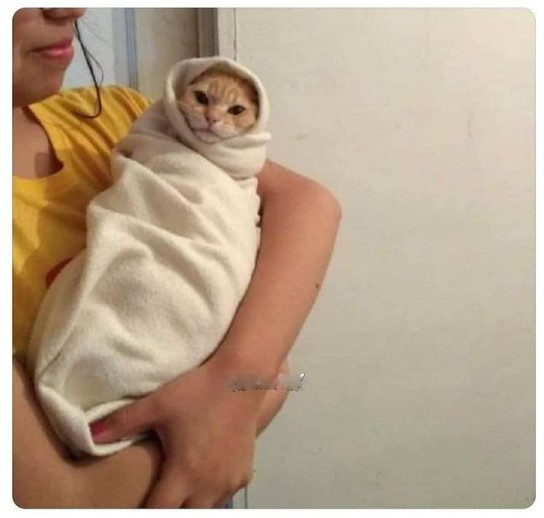

In [ ]:
import catboost as cat


#TUNEANDO HIPERPARAMETROS CON GRID SEARCH



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

#Grid Search
xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier',XGBClassifier())])
gbm_param_grid = {
    'classifier__learning_rate': np.array([0.01,0.001]),
    'classifier__n_estimators': np.array([100,200,300,400]),
    'classifier__subsample': np.array([0.7,0.8,0.9]),
    'classifier__max_depth': np.array([10,11,12,13,14,15,16,17]),
    'classifier__lambda': np.array([1]),
    'classifier__gamma': np.array([0])
    #'classifier__colsample_bytree': np.arange(0,1.1,.2)
}

grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=gbm_param_grid, n_jobs= -1,
                         scoring='f1_weighted', verbose=10)

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 32

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                              

In [ ]:
pred_tun = grid_search.predict(x_test)

error = log_loss(y_test, pred_tun)
error

2.2194347701866834

In [ ]:
#Grid Search
xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier',xg_reg)])
gbm_param_grid = {
    'classifier__learning_rate': np.array([0.01,0.001]),
    'classifier__n_estimators': np.array([100,200,300,400]),
    'classifier__subsample': np.array([0.7,0.8,0.9]),
    'classifier__max_depth': np.array([10,11,12,13,14,15,16,17]),
    'classifier__lambda': np.array([1]),
    'classifier__gamma': np.array([0])
    #'classifier__colsample_bytree': np.arange(0,1.1,.2)
}

grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=gbm_param_grid, n_jobs= -1,
                         scoring='f1_weighted', verbose=10)

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.9s


ValueError: ignored

In [ ]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=xg_reg,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 10.0min finished


In [ ]:
pred_tunGV = grid_result.predict(x_test)

error = log_loss(y_test, pred_tunGV)
error

0.43855787785864453

In [ ]:
# Sacamos el y_test_de_practica_agrupado_por_opp
oportunidades_test_de_practica = x_test['Opportunity_ID']
oportunidades_test_de_practica = oportunidades_test_de_practica.to_frame()

stage_test_de_practica = y_test.to_frame()

oportunidades_test_de_practica['Target'] = stage_test_de_practica
y_test_agrupado_por_opp = oportunidades_test_de_practica.groupby('Opportunity_ID').agg({'Target' : 'mean'})
y_test_agrupado_por_opp = y_test_agrupado_por_opp.reset_index()

In [ ]:
# Sacamos el preds_agrupado_por_opp
oportunidades_test_de_practica = x_test['Opportunity_ID']
oportunidades_test_de_practica = oportunidades_test_de_practica.to_frame()

oportunidades_test_de_practica['Target'] = pred_tunGV

preds_agrupado_por_opp = oportunidades_test_de_practica.groupby('Opportunity_ID').agg({'Target' : 'mean'})
preds_agrupado_por_opp = preds_agrupado_por_opp.reset_index()

In [ ]:
# Calculamos el error con groupby hecho
error = log_loss(y_test_agrupado_por_opp['Target'], np.nan_to_num(preds_agrupado_por_opp['Target'].to_numpy()))
error

0.4543279847193309

In [ ]:
# Ahora predecimos con el set de test
preds_testGV = grid_result.predict(data_test)

In [ ]:
# Sacamos el preds_test_agrupado_por_opp

preds_testGV = grid_result.predict(data_test)
oportunidades_testGV = data_test['Opportunity_ID'].to_frame()

oportunidades_testGV['Target'] = preds_testGV

preds_test_agrupado_por_oppGV = oportunidades_testGV.groupby('Opportunity_ID').agg({'Target' : 'mean'})
preds_test_agrupado_por_oppGV = preds_test_agrupado_por_oppGV.reset_index()

preds_test_agrupado_por_oppGV.to_csv('preds_testgv.csv', index=False, header=True)
files.download('preds_testgv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
preds_testGV

,Opportunity_ID,Target
0,10689,0.584612
1,10690,0.567522
2,10691,0.536654
3,10692,0.484819
4,10693,0.712068
...,...,...
1562,12364,0.675117
1563,12365,0.476207
1564,12366,0.410613
1565,12367,0.396612


In [ ]:
preds_test_agrupado_por_opp

,Opportunity_ID,Target
0,10689,0.584612
1,10690,0.567522
2,10691,0.536654
3,10692,0.484819
4,10693,0.712068
...,...,...
1562,12364,0.675117
1563,12365,0.476207
1564,12366,0.410613
1565,12367,0.396612
